# GEOS 518 Notebook 1: Reading in Time Series Data
   ## By: Zakk Hess
   ## January 27th, 2018

### Overview of Analysis:
   In this analysis, daily observed temperature at Bogus Basin (Idaho, USA) will be plotted, the stationarity will be assessed, and the autocorrelation will be plotted and determined which will then be interpreted based on intuition of the physical properties.
   
   Dataset downloaded from SNOTEL site through the NRCS (https://www.wcc.nrcs.usda.gov/snow/)

## 1) Load libraries and import data

In [2]:
import pandas as pd # data management
import numpy as np # computations
import matplotlib.pyplot as plt # plotting
from scipy.stats import kurtosis #assess kurtosis, function
from scipy.stats import skew #assess skewness, function
from statsmodels.tsa.stattools import adfuller #for augmented dickey-fuller test

df = pd.read_csv('BB_AirT_12_17.csv', names=['Y','M','D','T(C)'], skiprows=1) #load CSV into variable df

print(df) #see matrix

         Y   M   D   T(C)
0     2012  10   2  11.11
1     2012  10   3   5.56
2     2012  10   4   5.00
3     2012  10   5   3.33
4     2012  10   6   2.78
5     2012  10   7   5.00
6     2012  10   8   6.67
7     2012  10   9   9.44
8     2012  10  10   8.89
9     2012  10  11  10.00
10    2012  10  12  11.67
11    2012  10  13   6.11
12    2012  10  14   8.89
13    2012  10  15   9.44
14    2012  10  16   6.11
15    2012  10  17   2.22
16    2012  10  18   6.67
17    2012  10  19  10.00
18    2012  10  20   4.44
19    2012  10  21   1.67
20    2012  10  22   0.56
21    2012  10  23  -2.78
22    2012  10  24  -2.22
23    2012  10  25  -2.22
24    2012  10  26  -1.67
25    2012  10  27   1.67
26    2012  10  28   6.11
27    2012  10  29   6.67
28    2012  10  30   9.44
29    2012  10  31  11.11
...    ...  ..  ..    ...
1795  2017   9   1  18.33
1796  2017   9   2  18.89
1797  2017   9   3  20.56
1798  2017   9   4  23.89
1799  2017   9   5  20.56
1800  2017   9   6  20.56
1801  2017  

## Compute Serial Dates

In [5]:
df['SerialDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') #use YMD to make date (SerialDates) for each value in var.

print(df) #show matrix with serial dates datetime var. included 

         Y   M   D   T(C) SerialDates
0     2012  10   2  11.11  2012-10-02
1     2012  10   3   5.56  2012-10-03
2     2012  10   4   5.00  2012-10-04
3     2012  10   5   3.33  2012-10-05
4     2012  10   6   2.78  2012-10-06
5     2012  10   7   5.00  2012-10-07
6     2012  10   8   6.67  2012-10-08
7     2012  10   9   9.44  2012-10-09
8     2012  10  10   8.89  2012-10-10
9     2012  10  11  10.00  2012-10-11
10    2012  10  12  11.67  2012-10-12
11    2012  10  13   6.11  2012-10-13
12    2012  10  14   8.89  2012-10-14
13    2012  10  15   9.44  2012-10-15
14    2012  10  16   6.11  2012-10-16
15    2012  10  17   2.22  2012-10-17
16    2012  10  18   6.67  2012-10-18
17    2012  10  19  10.00  2012-10-19
18    2012  10  20   4.44  2012-10-20
19    2012  10  21   1.67  2012-10-21
20    2012  10  22   0.56  2012-10-22
21    2012  10  23  -2.78  2012-10-23
22    2012  10  24  -2.22  2012-10-24
23    2012  10  25  -2.22  2012-10-25
24    2012  10  26  -1.67  2012-10-26
25    2012  

##  Plot the data

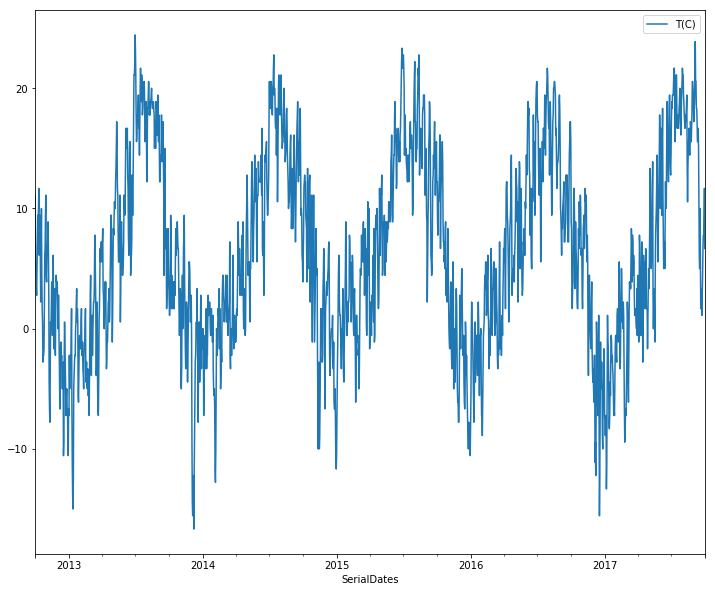

In [26]:
%matplotlib inline 
df.plot(x='SerialDates', y='T(C)',figsize=(12,10)) #plot df var. x-axis of date and y-axis temp. T(C)

## 2) Compute Statistics and Assess Stationarity of Dataset 

SUMMARY STATISTICS
min. :  -16.67
max. :  24.44
mean :  6.319
std. dev. :  8.035
variance :  64.5616
skewness :  0.0301
kurtosis :  -0.7543


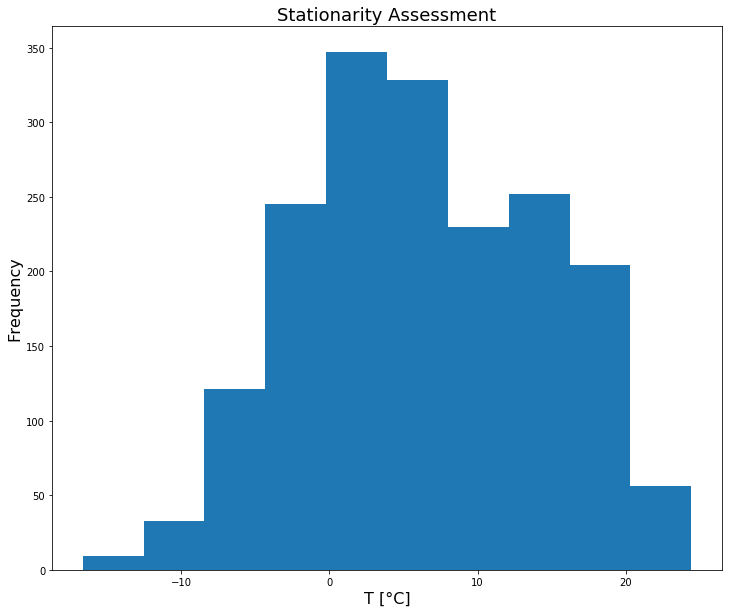

In [14]:
#Get temp from dataframe
T = df['T(C)'].values 

#Calculate basic statistics
print('\033[4mSUMMARY STATISTICS\033[0m')
print("min. : ", round(np.min(T),4))
print("max. : ", round(np.max(T),4))
print("mean : ", round(np.mean(T),4))
print("std. dev. : ", round(np.std(T),4))
print("variance : ", round(np.var(T),4))
print("skewness : ", round(skew(T),4))
print("kurtosis : ", round(kurtosis(T),4))

plt.figure(figsize=(12,10)) #creaTE figure
plt.hist(T) #plot histogram of temp data
plt.title('Stationarity Assessment',fontsize=18) #title 
plt.xlabel('T [\N{DEGREE SIGN}C]',fontsize=16) #x-axis label
plt.ylabel('Frequency',fontsize=16) #y-axis label

## Augmented Dickey-Fuller Test


In [9]:
result = adfuller(T) #put results of Dickey-Fuller test into var. 'result'
print('ADF Statistic: %f' % result[0]) #print first component of ADF test, which is ADF stat.
print('p-value: %f' % result[1]) #print second component of ADF test, which is p-value
print('Critical Values:')
for key, value in result[4].items(): #loop through each key and value of the 4th component of ADF test, crit. values
    print('\t%s: %.3f' % (key, value)) #print those keys and values

ADF Statistic: -3.117382
p-value: 0.025293
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


### Conclusion of Stationarity Assessment
As can be seen in the histogram plot of the data, the data seems to have a normal, gaussian distribution, this is indicative that the dataset is most likely stationary. The augmented Dickey-Fuller test gives a p-value that is less than 0.05 AND the ADF statistic is between critical values of 1% and 5%, thus we can conclude stationarity with a significance level of between 1% and 5%. Based on these two lines of evidence and the values of the moments of the data (mean, variance, skewness, and kurtosis) it's concluded that the data set has stationarity.

## 3) Compute and plot the autocorrelation function of the time series
### Get two time series that are lagged by one $\Delta t$, and plot them against each other

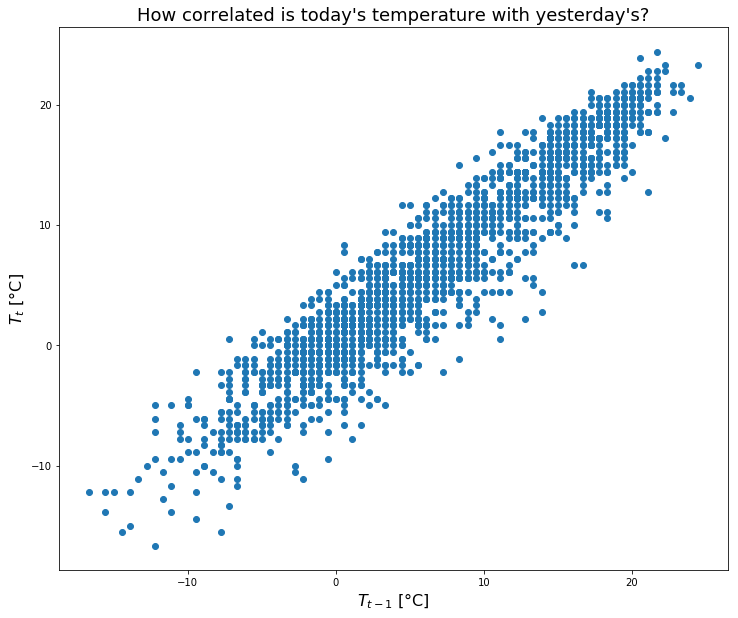

0.94002


In [28]:
# Use the pandas .values operator to load the values of temperature (the 'T(C)' column)
# from the pandas dataframe into a numpy array
T = df['T(C)'].values 

# Use numpy array indexing to get Temp. from October 2, 2012 to September 30, 2017. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
Tt   = T[1:-1] 

# Similarly get discharge from October 1, 2012 to September 29, 2017 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
Ttm1 = T[0:-2]


# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(12,10))
plt.plot(Ttm1,Tt,'o')
plt.title('How correlated is today\'s temperature with yesterday\'s?',fontsize=18)
plt.xlabel('$T_{t-1}$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.ylabel('$T_t$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.show()

#statistical measure of the correlation (R^2 value)
R2=np.corrcoef(Ttm1,Tt)
R2 = round(R2[1,0],5)
print(R2)

##  How correlated is temperature today with temperature from 30 and 365 days ago?


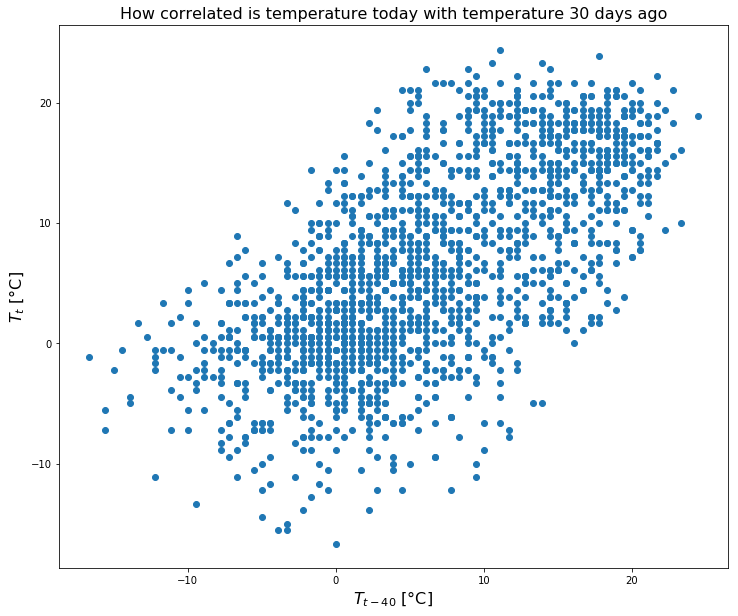

0.65997


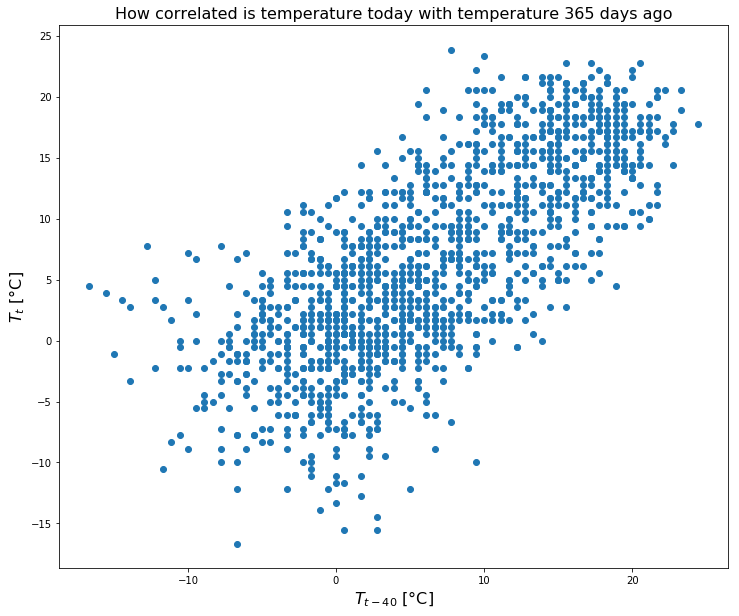

0.73022


In [27]:
###################################
##30 days
Tt   = T[30:-1] #array of Tt for 30 day comparison
Ttmk = T[0:-31] #array of Ttmk for 30 day comparison

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(12,10))
plt.plot(Ttmk,Tt,'o') #plot vs one another, correlation
plt.title('How correlated is temperature today with temperature 30 days ago',fontsize=16)
plt.xlabel('$T_{t-40}$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.ylabel('$T_t$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.show()

#Correlation of new analysis 
R=np.corrcoef(Ttmk,Tt) #determine R value of the correlation
R = round(R[1,0],5) #round the value
print(R) #print to output


###################################
## Out of curiosity
##365 days
Tt1   = T[365:-1]  #array of Tt for 365 day comparison
Ttmk1 = T[0:-366] #array of Ttmk for 365 day comparison

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(12,10))
plt.plot(Ttmk1,Tt1,'o') #plot vs one another, correlation
plt.title('How correlated is temperature today with temperature 365 days ago',fontsize=16)
plt.xlabel('$T_{t-40}$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.ylabel('$T_t$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.show()

#Correlation of new analysis 
R_1 =np.corrcoef(Ttmk1,Tt1) #determine R value of the correlation
R_1 = round(R_1[1,0],5) #round
print(R_1) #print to ouput

##  Compute and Plot Autocorrelation Function of Dataset

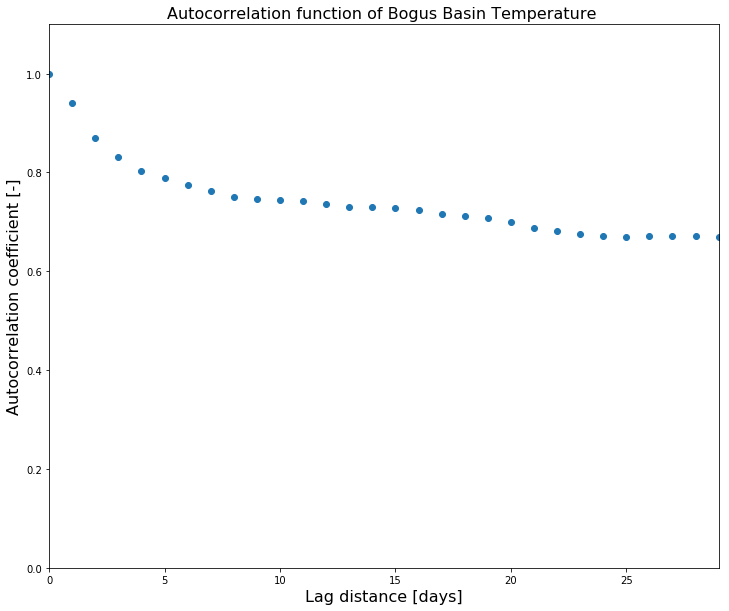

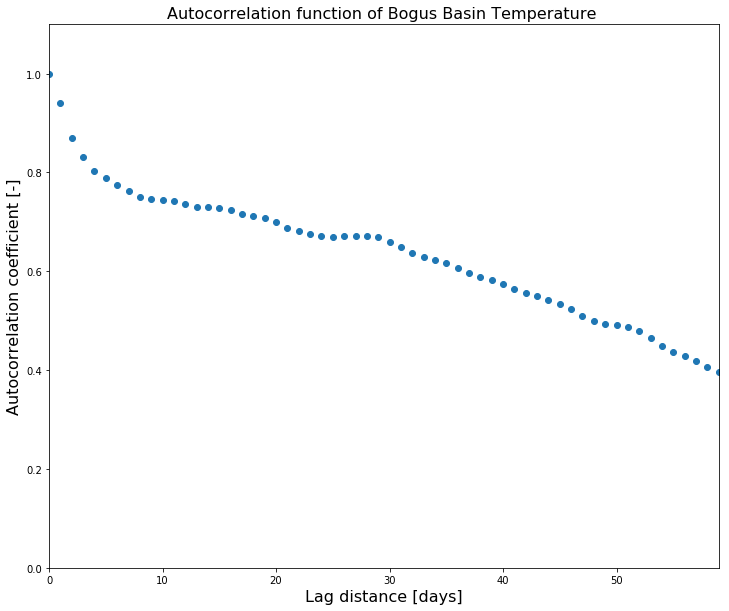

In [21]:
#get autocorrelation coefficient for 0 to 30 days
Nk = 30 #var for length of days of analysis
K  = np.arange(0,Nk,1) #array 0 to Nk (30) by 1
Rk = np.zeros((Nk,1)) #array of zeros size Nk(30) x 1 

#loop through array K length Nk(30) and determine the correlation of Tt and Ttmk at each iteration 0 to 30 days
for k in K: 
    Tt   = T[k:-1] 
    Ttmk = T[0:-(1+k)]
    R = np.corrcoef(Ttmk,Tt)
    Rk[k] = R[1,0] #determined R value at each iteration
  
#plot R value at each day from 0 to 30 of correlation, autocorrelation
plt.figure(figsize=(12,10)) 
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Bogus Basin Temperature ',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

#################
#same procedure as previously executed, but on 60 day lag 
#60 days
Nk = 60
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    Tt   = T[k:-1] 
    Ttmk = T[0:-(1+k)]
    R = np.corrcoef(Ttmk,Tt)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(12,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Bogus Basin Temperature ',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

## Autocorrelation function over entire datset (5 years)

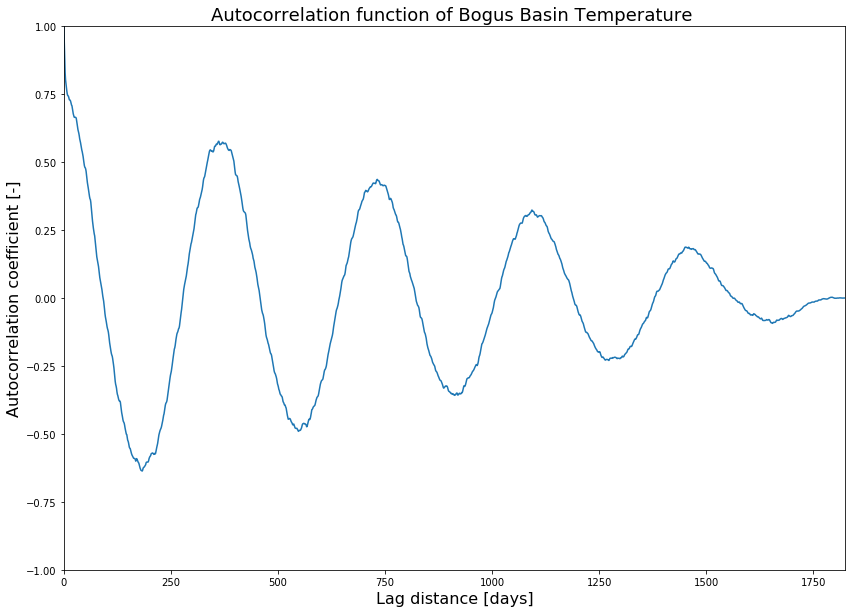

In [24]:
#ENTIRE DATASET (5 years)
Tp = T - np.mean(T) #subtract mean from all points of T, put into var
autocovs2 = np.correlate(Tp, Tp, mode='full') #get R from function of Tp vs Tp
N = autocovs2.size #size of autocovs2
autocovs2_oneside = autocovs2[N//2:] #length of 1/2 of size of autocovs2
autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0] #length of the other side

Nk2 = 365*5 #length = 5 years worth of days
K2 = np.arange(0,Nk2,1) #array size of 5 years worth of days

#plot R value at each day from 0 to 5 years of correlation, autocorrelation
plt.figure(figsize=(14,10))
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-') #plot as line 
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of Bogus Basin Temperature ',fontsize=18)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)


### Justification for not detrending data and potential ramifications 
I chose not to detrend the data, as there is a very obvious cyclical (seasonal) trend in the data (temperature). Detrending the data is not necessary to see a systematic trend in the data, it can be seen in the plotting of raw data and through the autocorrelation over 5 years. The dataset was determined to have stationarity without detrending, thus I chose not to take an extra step for more validation.

The ramificaitons for not detrending the dataset are, had I not been completely sure of the stationarity, I could come to an incorrect conclusion about the stationarity of the dataset without detrending. This is another way I could validate the stationarity, but due to using the "gold standard" Augmented Dickey-Fuller test and concluding stationarity, I don't feel it's necessary.

## 5) Discussion of results for analyses

### Can you explain why the autocorrelation function behaves as you observe it to based on physical intuition?

The reasoning for the behavior of the autocorrelation function is that temperature in this area has a distinct trend with seasons. There is a definitive higher temperature season every year around the same time (summer) and a definitive low temperature season annualy (winter). The magnitude of the season may vary interannually, but the same trend of increasing and decreasing temperature (high and low) exists. Due to the trend consistently occuring with seasons, we could predict whether or not a temperature will be high or low (20C vs 0C) in a given month, but due to the complex intraannual variability we cannot predict this with fine resolution.

As can be seen in the autocorrelation, as we get further from our first day, our correlation coefficient decreases, even when the summer days are compared to summer days or winter days to winter days. As we get further from our first date our ability to predict the temperature on a given day decreases. This could be due to temperatures being more variable in that month or just a function of how variable a temperature can be interannualy at a certain time.